In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
batch_size = 100
img_height = 250
img_width = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 792 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [4]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
from keras.applications.vgg16 import VGG16

In [6]:


img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.VGG16(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False



58889256/58889256 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 161s 8s/step - loss: 5.2969 - accuracy: 0.5442 - val_loss: 0.7202 - val_accuracy: 0.6633
Epoch 2/50
8/8 [==============================] - 6s 739ms/step - loss: 0.5884 - accuracy: 0.6793 - val_loss: 0.5057 - val_accuracy: 0.7143
Epoch 3/50
8/8 [==============================] - 6s 780ms/step - loss: 0.3881 - accuracy: 0.8283 - val_loss: 0.3937 - val_accuracy: 0.8061
Epoch 4/50
8/8 [==============================] - 6s 713ms/step - loss: 0.2455 - accuracy: 0.9179 - val_loss: 0.3551 - val_accuracy: 0.8673
Epoch 5/50
8/8 [==============================] - 6s 707ms/step - loss: 0.1450 - accuracy: 0.9571 - val_loss: 0.2589 - val_accuracy: 0.8878
Epoch 6/50
8/8 [==============================] - 5s 701ms/step - loss: 0.0947 - accuracy: 0.9722 - val_loss: 0.2779 - val_accuracy: 0.9082
Epoch 7/50
8/8 [==============================] - 6s 771ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.2305 - val_accuracy: 0.9184
Epoch 8/50
8/8 [=====

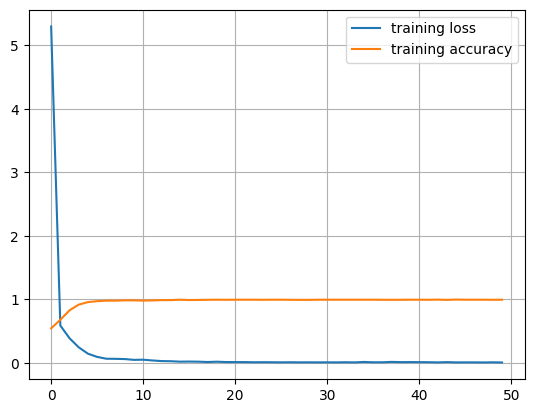

In [10]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

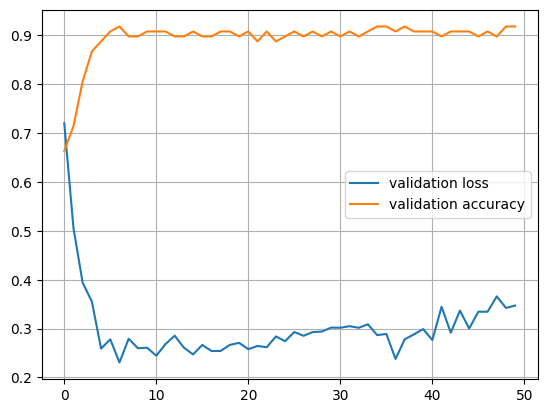

In [11]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [12]:
AccuracyVector = []

plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels

    # Calculate accuracy
    accuracy = np.mean(AccuracyVector)

    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Display predicted and actual labels along with accuracy
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] + f'\nAccuracy: {AccuracyVector[i]}')

        plt.axis('off')
        plt.grid(True)

# Display overall accuracy
plt.suptitle(f'Overall Accuracy: {accuracy:.2%}', fontsize=20)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# Confusion Matrix

truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
#positive event is accident negative event is non accident
for i in range(0,100):
    if(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Accident'):
        truePositive+=1
    elif(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Non Accident'):
        trueNegative+=1
    elif(predlabel[i]=='Non Accident' and class_names[labels[i]]=='Accident'):
        falseNegative+=1
    else:
        falsePositive+=1

In [14]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

True positives are: 46
True negatives are: 50
False negatives are: 1
False positives are: 3


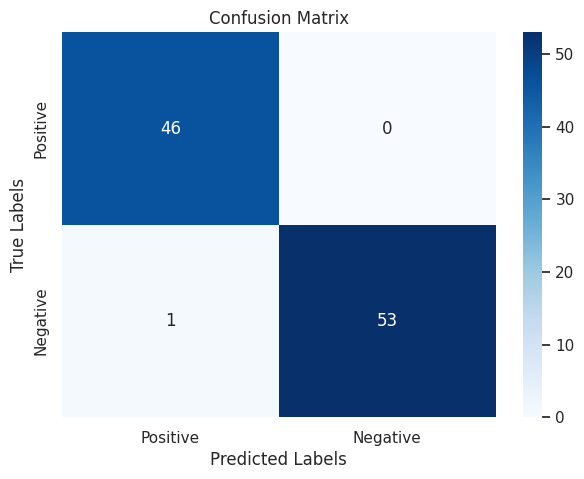

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_positives = 46
true_negatives = 53
false_negatives = 1
false_positives = 0

confusion_mat = confusion_matrix([1, 0, 1, 0], [1, 0, 0, 1],
                                  labels=[1, 0],
                                  sample_weight=[true_positives, true_negatives, false_positives, false_negatives])

labels = ['Positive', 'Negative']

sns.set()
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
pip install keras

In [17]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [18]:
import keras

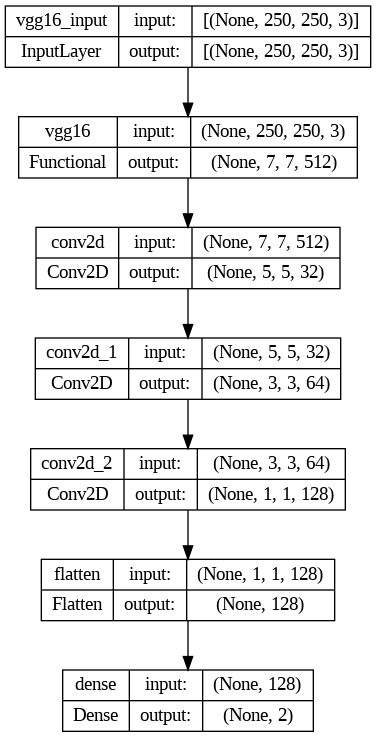

In [19]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
print(class_names)

['Accident', 'Non Accident']


In [21]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [24]:
import cv2
import tensorflow as tf

image=[]
label=[]

c=1
cap= cv2.VideoCapture('/content/drive/MyDrive/videoplayback (online-video-cutter.com).mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 [==============================] - 2s 2s/step
60
1/1 [==============================] - 0s 21ms/step
90
1/1 [==============================] - 0s 20ms/step
120
1/1 [==============================] - 0s 20ms/step
150
1/1 [==============================] - 0s 20ms/step
180
1/1 [==============================] - 0s 22ms/step
210
1/1 [==============================] - 0s 19ms/step
240
1/1 [==============================] - 0s 21ms/step
270
1/1 [==============================] - 0s 30ms/step
300
1/1 [==============================] - 0s 19ms/step
330
1/1 [==============================] - 0s 19ms/step
360
1/1 [==============================] - 0s 22ms/step
390
1/1 [==============================] - 0s 22ms/step
420
1/1 [==============================] - 0s 24ms/step
450
1/1 [==============================] - 0s 21ms/step
480
1/1 [==============================] - 0s 23ms/step
510
1/1 [==============================] - 0s 19ms/step
540
1/1 [==============================] - 0s 29ms/st

No Accident
AxesImage(size=(360, 640))


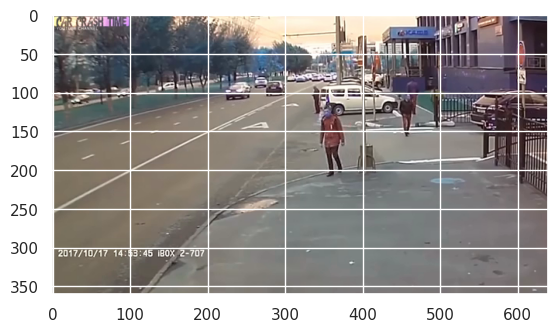

In [29]:
print(label[20])
print(plt.imshow(image[20]))